In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [65]:
import seaborn as sns

In [153]:
df = pd.read_csv(r"military-spending-sipri.csv")

In [154]:
df.tail()

,Entity,Code,Year,Military expenditure (constant US$)
8867,Zimbabwe,ZWE,2019,197050480.0
8868,Zimbabwe,ZWE,2020,260212400.0
8869,Zimbabwe,ZWE,2021,491183260.0
8870,Zimbabwe,ZWE,2022,332717340.0
8871,Zimbabwe,ZWE,2023,232859280.0


In [38]:
# List of countries to analyze
countries = [
    "Canada", "China", "European Union (SIPRI)", "France", "Germany",
    "Japan", "Israel", "Italy", "Spain", "United Kingdom", "United States"
]

In [39]:
sequence_length = 5  # Number of past years to use for prediction
future_years = 10  # Number of years to predict

In [42]:
# Create a figure for plotting
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [44]:
sequence_length = 5  # Number of past years to use for prediction
future_years = 10  # Number of years to predict

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For Canada, the last recorded expenditure in 2023 was $27,257,029,000.00. The model predicts an expenditure of $27,918,010,368.00 for 2024, representing a change of $660,981,368.00 (2.42%). This suggests a potential increase in military expenditure.


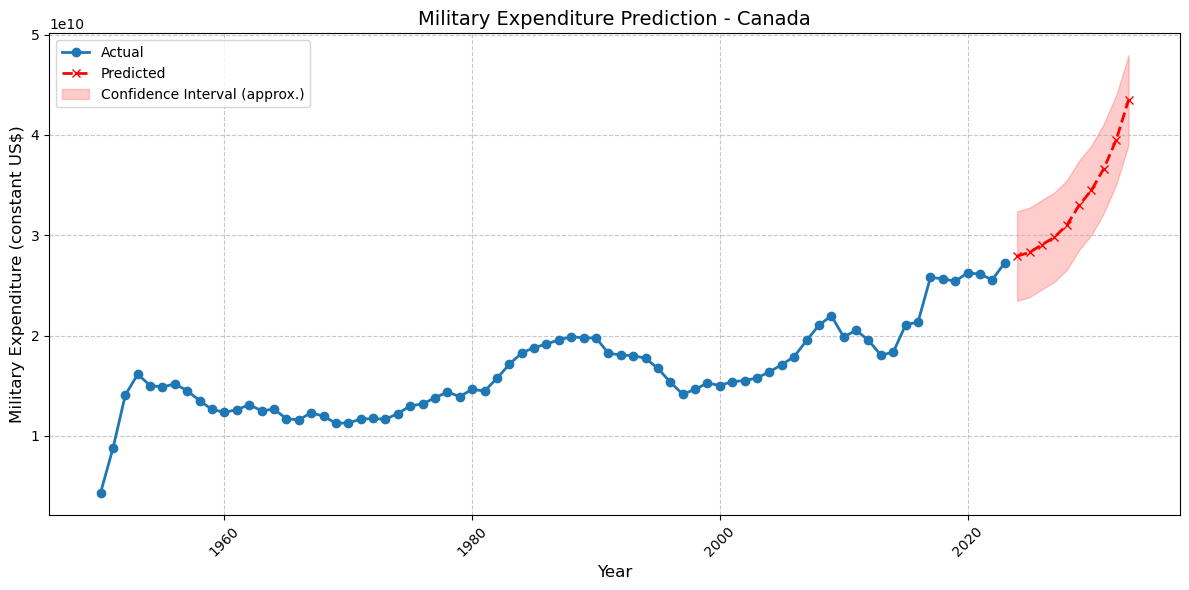

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For China, the last recorded expenditure in 2023 was $309,484,320,000.00. The model predicts an expenditure of $330,899,718,144.00 for 2024, representing a change of $21,415,398,144.00 (6.92%). This suggests a potential increase in military expenditure.


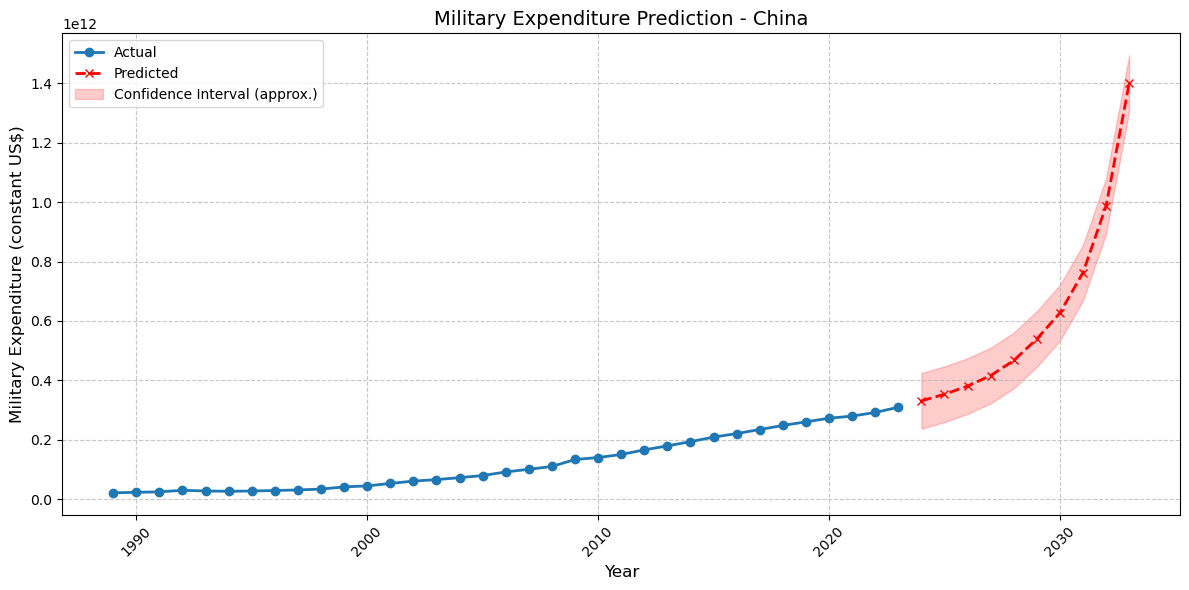

Skipping European Union (SIPRI): Not enough data (2 years).


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For France, the last recorded expenditure in 2023 was $57,124,717,000.00. The model predicts an expenditure of $51,750,117,376.00 for 2024, representing a change of $-5,374,599,624.00 (-9.41%). This suggests a potential decrease in military expenditure.


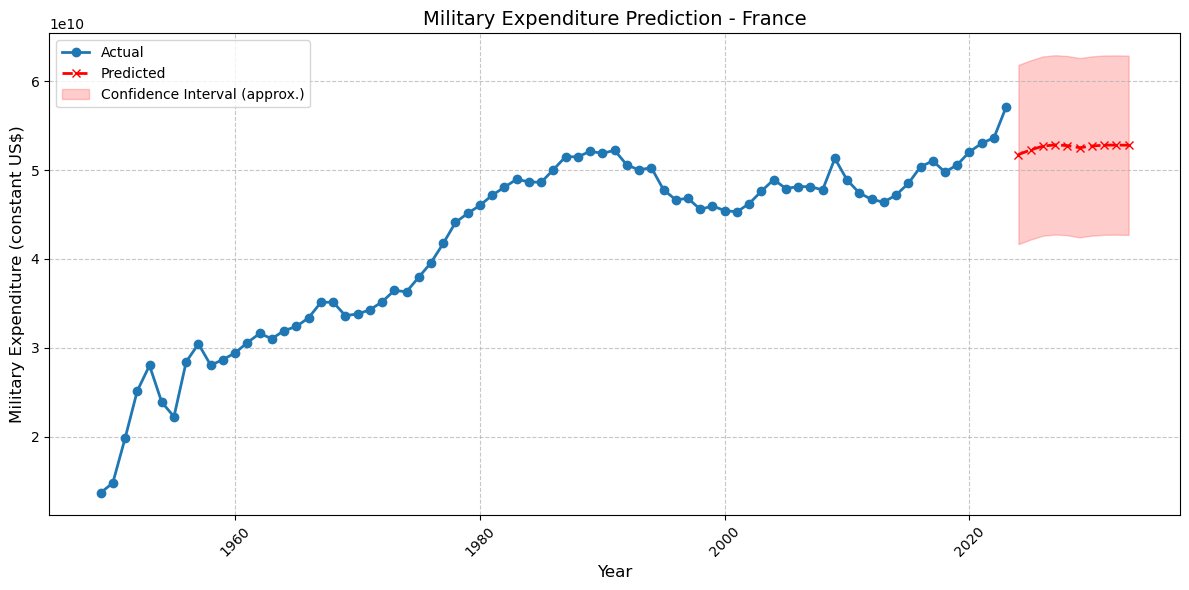

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For Germany, the last recorded expenditure in 2023 was $61,187,424,000.00. The model predicts an expenditure of $51,486,650,368.00 for 2024, representing a change of $-9,700,773,632.00 (-15.85%). This suggests a potential decrease in military expenditure.


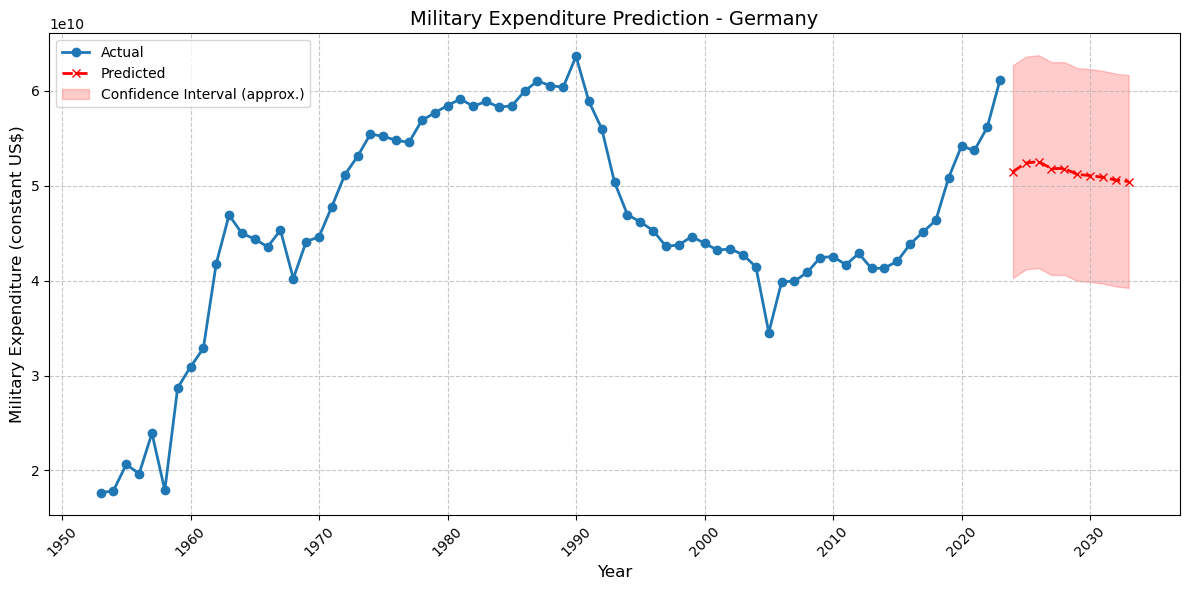

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For Japan, the last recorded expenditure in 2023 was $51,887,980,000.00. The model predicts an expenditure of $44,686,983,168.00 for 2024, representing a change of $-7,200,996,832.00 (-13.88%). This suggests a potential decrease in military expenditure.


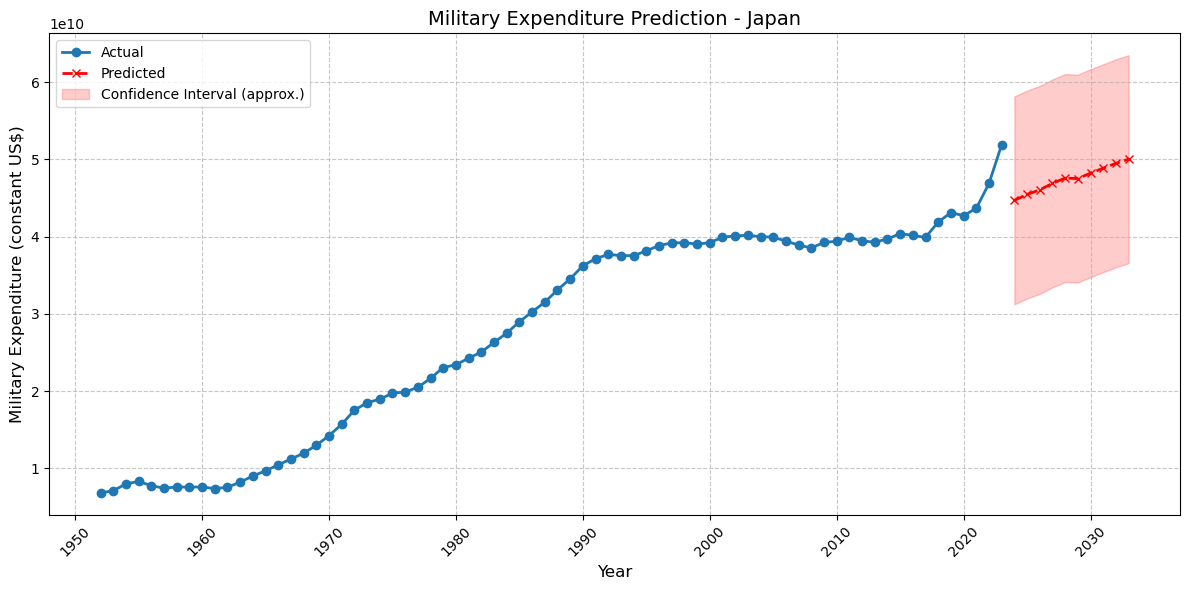

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For Israel, the last recorded expenditure in 2023 was $28,956,834,000.00. The model predicts an expenditure of $25,495,891,968.00 for 2024, representing a change of $-3,460,942,032.00 (-11.95%). This suggests a potential decrease in military expenditure.


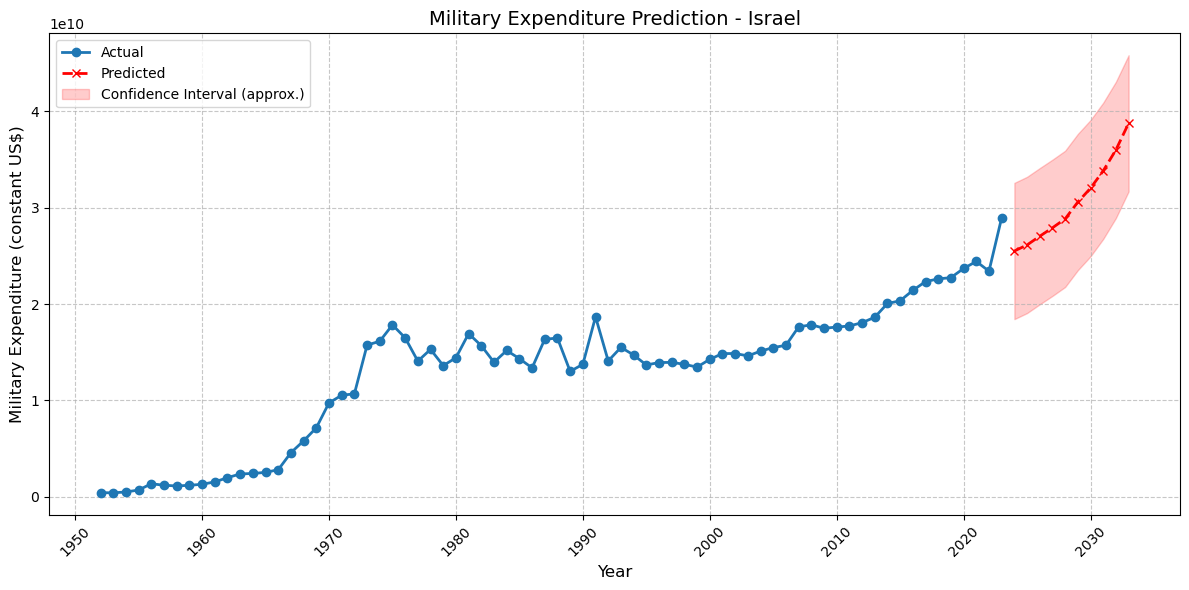

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For Italy, the last recorded expenditure in 2023 was $32,634,774,000.00. The model predicts an expenditure of $31,409,711,104.00 for 2024, representing a change of $-1,225,062,896.00 (-3.75%). This suggests a potential decrease in military expenditure.


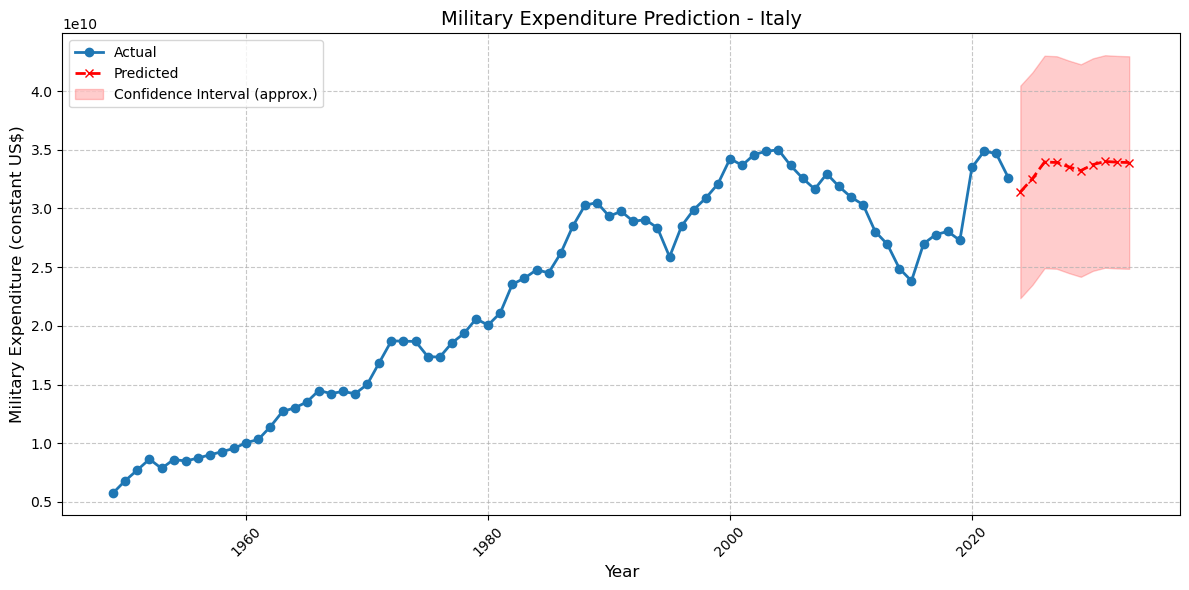

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For Spain, the last recorded expenditure in 2023 was $22,293,187,000.00. The model predicts an expenditure of $18,491,074,560.00 for 2024, representing a change of $-3,802,112,440.00 (-17.06%). This suggests a potential decrease in military expenditure.


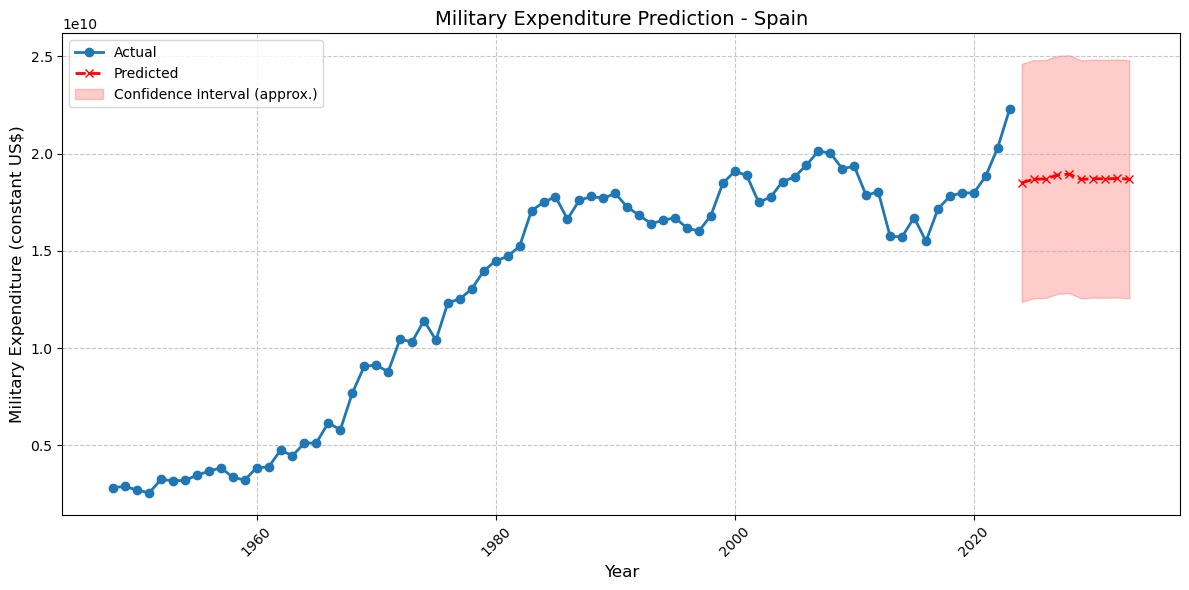

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For United Kingdom, the last recorded expenditure in 2023 was $69,153,235,000.00. The model predicts an expenditure of $60,189,200,384.00 for 2024, representing a change of $-8,964,034,616.00 (-12.96%). This suggests a potential decrease in military expenditure.


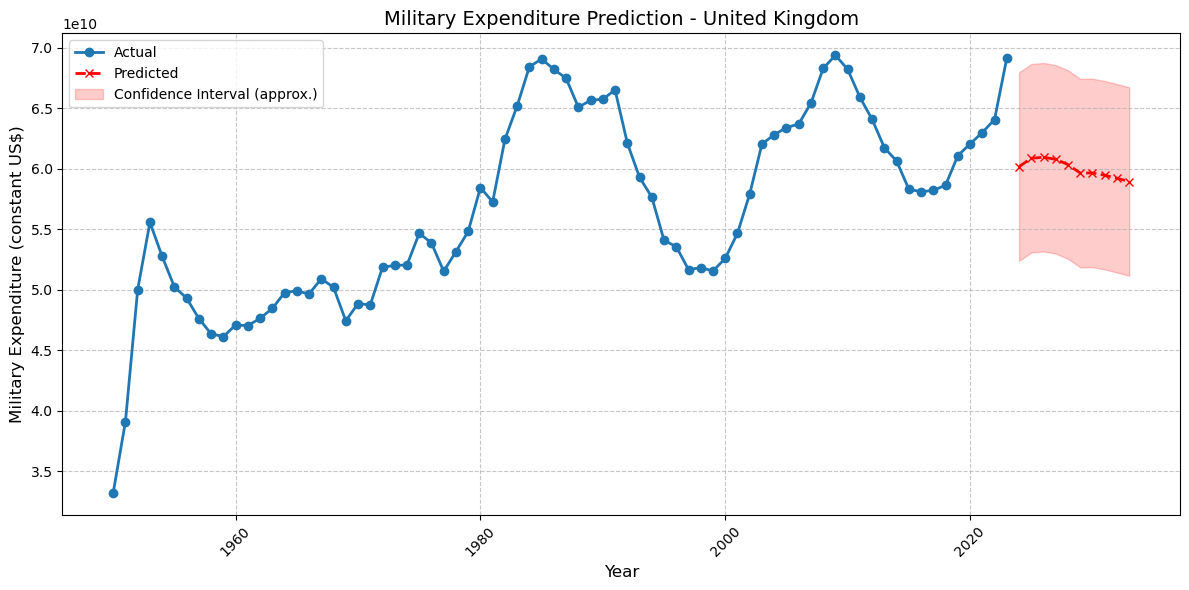

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


For United States, the last recorded expenditure in 2023 was $880,070,560,000.00. The model predicts an expenditure of $819,175,489,536.00 for 2024, representing a change of $-60,895,070,464.00 (-6.92%). This suggests a potential decrease in military expenditure.


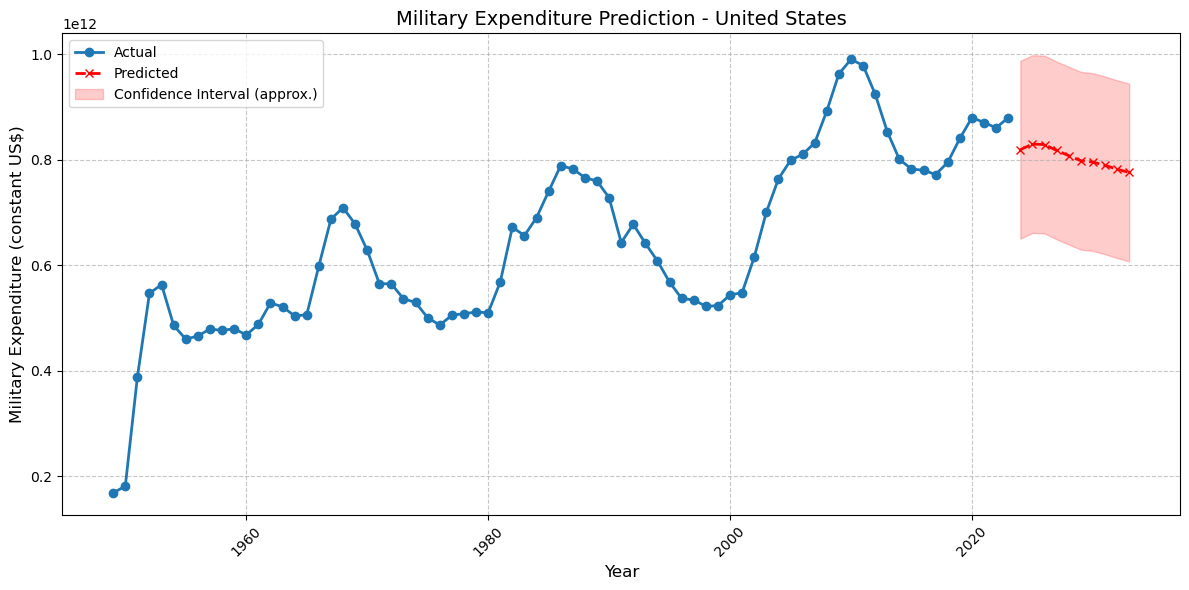

In [49]:
for country in countries:
    # Filter data for the country
    country_df = df[df["Entity"] == country].sort_values(by="Year")
    
    # Ensure we have enough data
    if len(country_df) < sequence_length:
        print(f"Skipping {country}: Not enough data ({len(country_df)} years).")
        continue
    
    # Normalize the military expenditure
    scaler = MinMaxScaler()
    country_df["Military expenditure (normalized)"] = scaler.fit_transform(
        country_df[["Military expenditure (constant US$)"]]
    )
    
    # Prepare sequences
    def create_sequences(data, seq_length):
        sequences, labels = [], []
        for i in range(len(data) - seq_length):
            sequences.append(data[i:i + seq_length])
            labels.append(data[i + seq_length])
        return np.array(sequences), np.array(labels)
    
    country_data = country_df["Military expenditure (normalized)"].values
    X, y = create_sequences(country_data, sequence_length)
    
    # Reshape for LSTM
    X = X.reshape((X.shape[0], X.shape[1], 1))
    
    # Train LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, batch_size=16, verbose=0)
    
    # Predict future values
    last_sequence = X[-1]  # Last known sequence
    predictions = []
    
    for _ in range(future_years):
        next_value = model.predict(last_sequence.reshape(1, sequence_length, 1), verbose=0)
        predictions.append(next_value[0][0])
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[-1] = next_value
    
    # Convert predictions back to original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    
    # Get years for plotting
    past_years = country_df["Year"].values
    future_years_range = np.arange(past_years[-1] + 1, past_years[-1] + 1 + future_years)
    
    # Enhanced Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(past_years, country_df["Military expenditure (constant US$)"], label="Actual", marker="o", linewidth=2)
    plt.plot(future_years_range, predictions, linestyle="--", label="Predicted", marker="x", color="red", linewidth=2)
    
    # Add shaded confidence interval (simplified, assuming constant error for demonstration)
    pred_mean = predictions.flatten()
    pred_std = np.std(country_df["Military expenditure (constant US$)"])
    plt.fill_between(future_years_range, pred_mean - pred_std, pred_mean + pred_std, color='red', alpha=0.2, label='Confidence Interval (approx.)')
    
    # Customize plot
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Military Expenditure (constant US$)", fontsize=12)
    plt.title(f"Military Expenditure Prediction - {country}", fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Dynamic Interpretation with Date Precision
    last_actual = country_df["Military expenditure (constant US$)"].iloc[-1]
    last_actual_year = country_df["Year"].iloc[-1]
    first_predicted = predictions[0][0]
    first_predicted_year = future_years_range[0]
    
    change = first_predicted - last_actual
    percentage_change = (change / last_actual) * 100 if last_actual != 0 else 0
    
    interpretation = f"For {country}, the last recorded expenditure in {last_actual_year} was ${last_actual:,.2f}. The model predicts an expenditure of ${first_predicted:,.2f} for {first_predicted_year}, representing a change of ${change:,.2f} ({percentage_change:,.2f}%)."
    
    if percentage_change > 0:
        interpretation += " This suggests a potential increase in military expenditure."
    elif percentage_change < 0:
        interpretation += " This suggests a potential decrease in military expenditure."
    else:
        interpretation += " This suggests the military expenditure is expected to remain relatively stable."
    
    print(interpretation)
    plt.show()


In [158]:
data = pd.read_csv(r"military-spending-sipri.csv")

In [159]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

In [160]:
entity_data = data.groupby("Entity")["Military expenditure (constant US$)"].apply(list)

In [161]:
# Parameters
timesteps = 5  # Window size
scaler = MinMaxScaler()

In [162]:
# Prepare sequences
sequences = []
for entity, expenditures in entity_data.items():
    exp = np.array(expenditures).reshape(-1, 1)
    scaled_exp = scaler.fit_transform(exp)
    for i in range(len(scaled_exp) - timesteps + 1):
        sequences.append(scaled_exp[i:i + timesteps])
sequences = np.array(sequences)

In [163]:
# Define model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, 1), return_sequences=False),
    RepeatVector(timesteps),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])
model.compile(optimizer='adam', loss='mse')
model.fit(sequences, sequences, epochs=50, batch_size=32, validation_split=0.1)

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0631 - val_loss: 0.0074
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0056 - val_loss: 0.0046
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 6/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 7/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 8/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 9/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 10/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 11/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 12/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

In [164]:
# Reconstruction and anomaly detection
reconstructed = model.predict(sequences)
errors = np.mean(np.square(sequences - reconstructed), axis=(1, 2))
threshold = np.mean(errors) + 2 * np.std(errors)
anomalies = errors > threshold

254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

In [166]:
X = data[["Military expenditure (constant US$)"]].values

In [167]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [168]:
# Train One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', nu=0.05)  # nu controls the fraction of outliers
predictions = ocsvm.fit_predict(X_scaled)

In [171]:
# Anomalies
data["Anomaly"] = predictions == -1
anomalies = data[data["Anomaly"]]
#print(anomalies[["Entity", "Year", "Military expenditure (constant US$)"]])

In [174]:
data

,Entity,Code,Year,Military expenditure (constant US$),Anomaly
0,Afghanistan,AFG,1970,62800316.0,False
1,Afghanistan,AFG,1973,72822540.0,False
2,Afghanistan,AFG,1974,70782330.0,False
3,Afghanistan,AFG,1975,74303500.0,False
4,Afghanistan,AFG,1976,94766424.0,False
...,...,...,...,...,...
8867,Zimbabwe,ZWE,2019,197050480.0,False
8868,Zimbabwe,ZWE,2020,260212400.0,False
8869,Zimbabwe,ZWE,2021,491183260.0,False
8870,Zimbabwe,ZWE,2022,332717340.0,False


In [196]:
countries = [
    "China", "United States", "Russia"
]

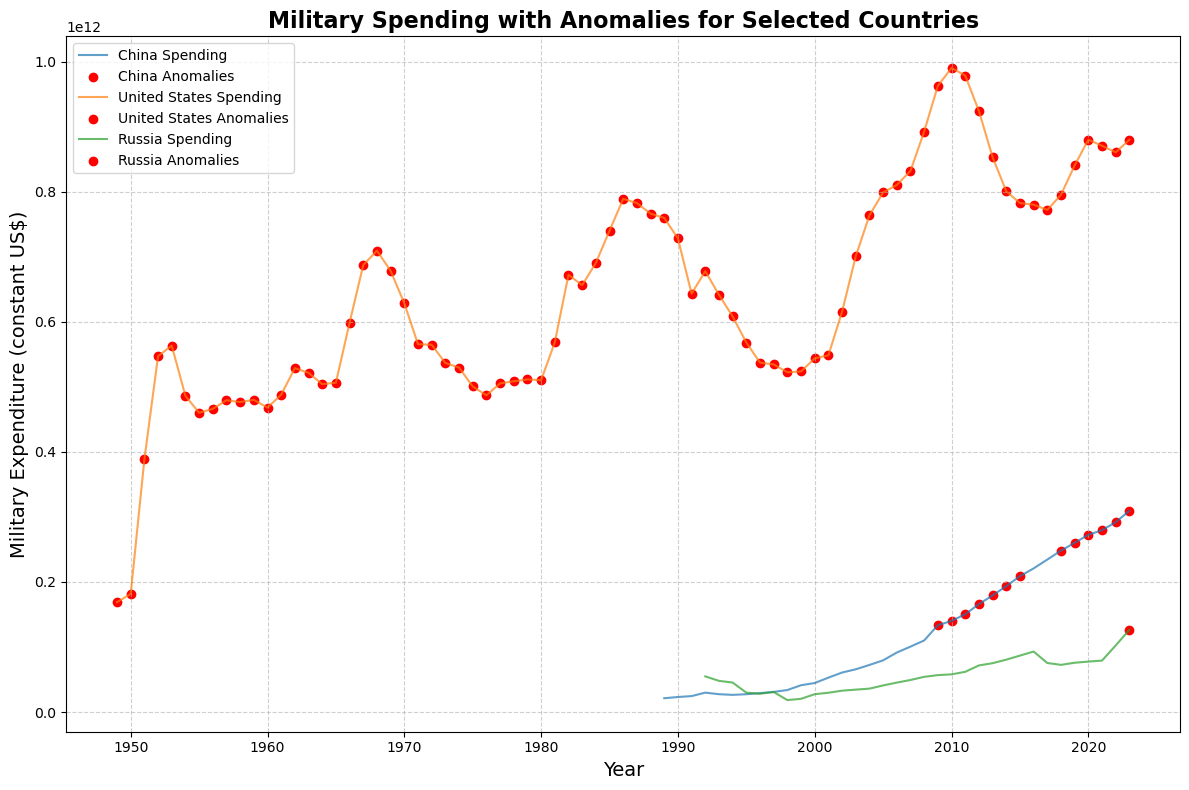

Dynamic Interpretation:
- China:
  - Experienced 13 anomaly/anomalies in military spending.
  - Latest recorded military spending (2023): $309,484,320,000.00 (constant US$).
  - Recent trend: Increasing military spending.
- United States:
  - Experienced 75 anomaly/anomalies in military spending.
  - Latest recorded military spending (2023): $880,070,560,000.00 (constant US$).
  - Recent trend: Increasing military spending.
- Russia:
  - Experienced 1 anomaly/anomalies in military spending.
  - Latest recorded military spending (2023): $126,473,355,000.00 (constant US$).
  - Recent trend: Increasing military spending.



In [197]:
plt.figure(figsize=(12, 8))  # Adjust figure size for better clarity
for country in countries:
    entity_df = data[data["Entity"] == country]

    # Plot military spending
    plt.plot(entity_df["Year"], entity_df["Military expenditure (constant US$)"], label=f"{country} Spending", alpha=0.7, linewidth=1.5)

    # Plot anomalies
    anomaly_years = entity_df[entity_df["Anomaly"]]["Year"]
    anomaly_values = entity_df[entity_df["Anomaly"]]["Military expenditure (constant US$)"]
    plt.scatter(anomaly_years, anomaly_values, color='red', label=f"{country} Anomalies" if not anomaly_years.empty else "") # only label anomalies if there are any.

plt.xlabel("Year", fontsize=14)
plt.ylabel("Military Expenditure (constant US$)", fontsize=14)
plt.title("Military Spending with Anomalies for Selected Countries", fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6) #Add grid for improved readability.
plt.tight_layout() #Improve plot layout.
plt.show()

# Generate Dynamic Interpretation
interpretation_text = "Dynamic Interpretation:\n"
for country in countries:
    entity_df = data[data["Entity"] == country]
    anomaly_count = entity_df["Anomaly"].sum()
    latest_year = entity_df["Year"].max()
    latest_spending = entity_df[entity_df["Year"] == latest_year]["Military expenditure (constant US$)"].values[0] if not entity_df[entity_df["Year"] == latest_year].empty else "N/A"

    interpretation_text += f"- {country}:\n"
    if anomaly_count > 0:
        interpretation_text += f"  - Experienced {anomaly_count} anomaly/anomalies in military spending.\n"
    else:
        interpretation_text += f"  - No significant anomalies detected in military spending.\n"

    interpretation_text += f"  - Latest recorded military spending ({latest_year}): ${latest_spending:,.2f} (constant US$).\n"

    # Basic Trend Analysis (Optional, can be improved)
    if len(entity_df) > 2:
        last_two_years = entity_df.tail(2)["Military expenditure (constant US$)"].values
        if len(last_two_years) == 2:
            change = last_two_years[1] - last_two_years[0]
            if change > 0:
                interpretation_text += "  - Recent trend: Increasing military spending.\n"
            elif change < 0:
                interpretation_text += "  - Recent trend: Decreasing military spending.\n"
            else:
                interpretation_text += "  - Recent trend: Stable military spending.\n"
    else:
        interpretation_text += "  - Insufficient data for recent trend analysis.\n"

# Final Print Statement with Interpretation
print(interpretation_text)

In [188]:
countries = [
    "Canada", "China", "European Union (SIPRI)", "France", "Germany",
    "Japan", "Israel", "Italy", "Spain", "United Kingdom", "United States"
]

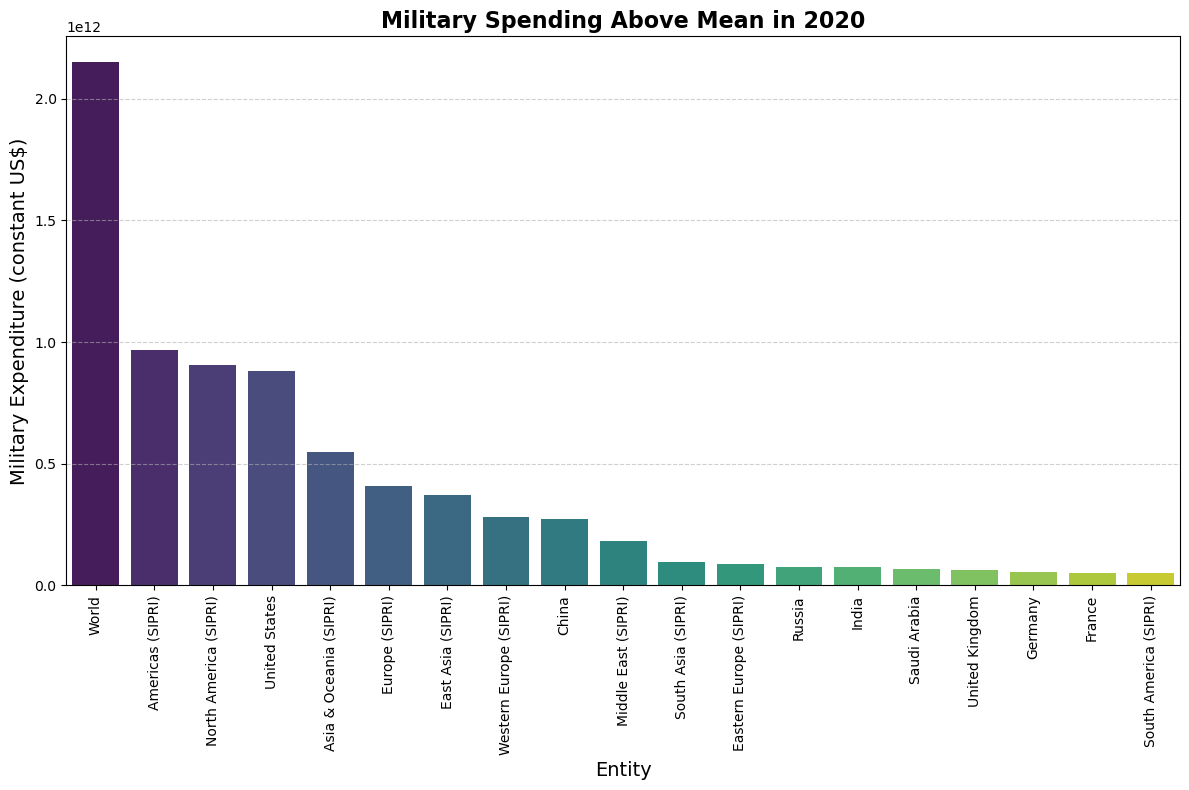

Interpretation of Military Spending Above Mean in 2020:

In 2020, the following countries had military expenditures exceeding the mean ($48,352,157,420.06):

- World: $2,148,920,600,000.00
- Americas (SIPRI): $968,243,700,000.00
- North America (SIPRI): $906,450,800,000.00
- United States: $880,185,250,000.00
- Asia & Oceania (SIPRI): $549,652,100,000.00
- Europe (SIPRI): $409,546,720,000.00
- East Asia (SIPRI): $373,200,220,000.00
- Western Europe (SIPRI): $283,022,600,000.00
- China: $272,509,060,000.00
- Middle East (SIPRI): $180,900,130,000.00
- South Asia (SIPRI): $94,617,860,000.00
- Eastern Europe (SIPRI): $89,873,105,000.00
- Russia: $77,544,910,000.00
- India: $77,085,470,000.00
- Saudi Arabia: $68,182,163,000.00
- United Kingdom: $62,064,890,000.00
- Germany: $54,191,854,000.00
- France: $52,053,620,000.00
- South America (SIPRI): $49,550,890,000.00

World had the highest military expenditure at $2,148,920,600,000.00.



In [198]:
year_df = data[data["Year"] == year]

# Calculate the mean military expenditure for the given year
mean_expenditure = year_df["Military expenditure (constant US$)"].mean()

# Filter countries with expenditure above the mean
high_spending_countries = year_df[
    (year_df["Military expenditure (constant US$)"] > mean_expenditure)
]

# Sort the countries by expenditure for better visualization
high_spending_countries = high_spending_countries.sort_values(by="Military expenditure (constant US$)", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=high_spending_countries["Entity"], y=high_spending_countries["Military expenditure (constant US$)"], hue=high_spending_countries["Entity"],
            palette="viridis", legend=False) # remove legend.
plt.xticks(rotation=90)
plt.xlabel("Entity", fontsize=14)
plt.ylabel("Military Expenditure (constant US$)", fontsize=14)
plt.title(f"Military Spending Above Mean in {year}", fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Generate Interpretation
interpretation_text = f"Interpretation of Military Spending Above Mean in {year}:\n\n"
if high_spending_countries.empty:
    interpretation_text += f"No countries exceeded the mean military expenditure (${mean_expenditure:,.2f}) in {year}.\n"
else:
    interpretation_text += f"In {year}, the following countries had military expenditures exceeding the mean (${mean_expenditure:,.2f}):\n\n"
    for index, row in high_spending_countries.iterrows():
        country = row["Entity"]
        expenditure = row["Military expenditure (constant US$)"]
        interpretation_text += f"- {country}: ${expenditure:,.2f}\n"

    # Find the highest spender
    highest_spender = high_spending_countries.iloc[0]
    highest_country = highest_spender["Entity"]
    highest_expenditure = highest_spender["Military expenditure (constant US$)"]
    interpretation_text += f"\n{highest_country} had the highest military expenditure at ${highest_expenditure:,.2f}.\n"

# Print Interpretation
print(interpretation_text)
